In [18]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [19]:
app_train = pd.read_pickle('../../Cleansed_Datasets/app_train_cleansed.pkl')
app_test = pd.read_pickle('../../Cleansed_Datasets/app_test_cleansed.pkl')

In [20]:
#some adjustments in the features names as the classifier modules is sensitive for special characters
app_train = app_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
app_test = app_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [21]:
X = app_train.loc[:, app_train.columns != 'TARGET']
y = app_train.TARGET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LGBMClassifier()

In [22]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [23]:
print('Accuracy score:', accuracy_score(pred, y_test))
print('Recall score:', recall_score(pred, y_test))
print('Precision score:', precision_score(pred, y_test))
print('F1 score:', f1_score(pred, y_test))
print('AUC score:', roc_auc_score(pred, y_test))

Accuracy score: 0.9313077939233818
Recall score: 0.2
Precision score: 0.006535947712418301
F1 score: 0.012658227848101266
AUC score: 0.5664607237422772


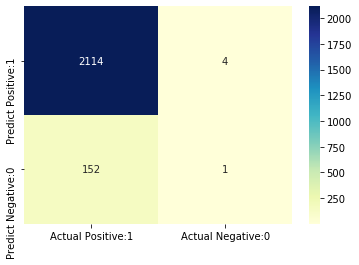

In [24]:
cm = confusion_matrix(y_test, pred)
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.738


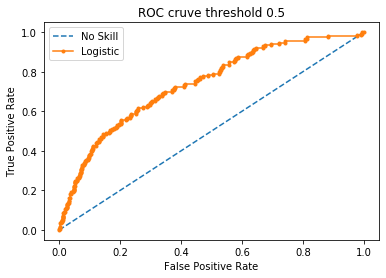

In [25]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, thresholds = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# Show the title
plt.title("ROC cruve threshold 0.5")
# show the plot
plt.show()

#### Hyper-parameter tuning LGBM